In [207]:
#pandas - they standard data manipulation package
import pandas as pd
#numpy - scientific computation - matrix operations, etc.
import numpy as np
#for feature selection
from sklearn import feature_selection
import os

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

#np.set_printoptions(threshold=np.inf)
#pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve,auc

In [97]:
# Load Data
filename = "data/application_train.csv" 
data_df = pd.read_csv(filename)
data_df.shape

(307511, 122)

In [98]:
data_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# get the default ratio
data_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

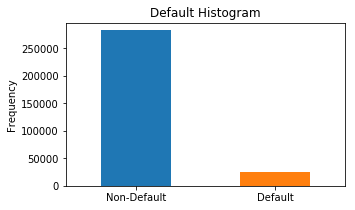

In [16]:
# bar plot of the target
data_df['TARGET'].value_counts().plot(kind='bar',figsize=[5,3])
plt.title('Default Histogram')
plt.xticks([0,1], ['Non-Default', 'Default'], rotation=0)
#plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [17]:
# checking constant value columns -> no constant value columns
data_df.columns[data_df.nunique() <= 1]

Index([], dtype='object')

In [41]:
data_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Missing Vaules Management

In [77]:
# checking missing data
percent = (data_df.isnull().sum()/data_df.isnull().count()*100)
total_null = data_df.isnull().count()*percent/100
missing_check  = pd.concat([total_null, percent], axis = 1, keys = ['Count Null', 'Percent']).sort_values(ascending = False, by = ['Percent'])
missing_check[missing_check.Percent > 0]

,Count Null,Percent
COMMONAREA_MEDI,214865.0,69.872297
COMMONAREA_AVG,214865.0,69.872297
COMMONAREA_MODE,214865.0,69.872297
NONLIVINGAPARTMENTS_MODE,213514.0,69.432963
NONLIVINGAPARTMENTS_AVG,213514.0,69.432963
NONLIVINGAPARTMENTS_MEDI,213514.0,69.432963
FONDKAPREMONT_MODE,210295.0,68.386172
LIVINGAPARTMENTS_MODE,210199.0,68.354953
LIVINGAPARTMENTS_AVG,210199.0,68.354953
LIVINGAPARTMENTS_MEDI,210199.0,68.354953


In [101]:
# Before missing value handling
data_df['COMMONAREA_MEDI'].describe()

count    92646.000000
mean         0.044595
std          0.076144
min          0.000000
25%          0.007900
50%          0.020800
75%          0.051300
max          1.000000
Name: COMMONAREA_MEDI, dtype: float64

In [102]:
# from missing data summary, we can see most empty data are from building related columns
building_related_col = data_df.columns.tolist()[44:91]

# fill missing data of building related columns,
# If the client has his own realty, then fill it with the mean vaule of existing data
# If the client does not has his own realty, then fill it with 0

data_df.loc[data_df.FLAG_OWN_REALTY == 'Y', building_related_col] = data_df.loc[data_df.FLAG_OWN_REALTY == 'Y', building_related_col].fillna(data_df[building_related_col].mean())
data_df.loc[data_df.FLAG_OWN_REALTY == 'N', building_related_col] = data_df.loc[data_df.FLAG_OWN_REALTY == 'N', building_related_col].fillna(0)


In [124]:
# A quick check
data_df['COMMONAREA_MEDI'].describe()

count    307511.000000
mean         -0.182575
std           0.432946
min          -1.000000
25%           0.001100
50%           0.044595
75%           0.044595
max           1.000000
Name: COMMONAREA_MEDI, dtype: float64

In [104]:
# we find the number of missing OWN_CAR_AGE is very close to the number of clients who doesnot own a car
data_df['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [107]:
# fill missing data of OWN_CAR_AGE column,
# If the client has his own car, then fill it with the mean vaule of existing data
# If the client does not has his own car, then fill it with 0
data_df.loc[data_df.FLAG_OWN_CAR == 'Y', 'OWN_CAR_AGE'] = data_df.loc[data_df.FLAG_OWN_CAR == 'Y', 'OWN_CAR_AGE'].fillna(data_df['OWN_CAR_AGE'].mean())
data_df.loc[data_df.FLAG_OWN_CAR == 'N', 'OWN_CAR_AGE'] = data_df.loc[data_df.FLAG_OWN_CAR == 'N', 'OWN_CAR_AGE'].fillna(value = 0)


In [108]:
# we find the dataset uses DAYS_EMPLOYED == 365243 to indicate the client is unemployed
data_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [109]:
# fill missing data of OCCUPATION_TYPE column,
# If the client is unemployed (DAYS_EMPLOYED = 365243), then fill the column with 'XNA'
# If the client is employed, then fill it with 'Other'
data_df.loc[data_df.DAYS_EMPLOYED == 365243, 'OCCUPATION_TYPE'] = data_df.loc[data_df.DAYS_EMPLOYED == 365243, 'OCCUPATION_TYPE'].fillna(value = 'XNA')
data_df.loc[data_df.DAYS_EMPLOYED < 365243, 'OCCUPATION_TYPE'] = data_df.loc[data_df.DAYS_EMPLOYED < 365243, 'OCCUPATION_TYPE'].fillna(value = 'Other')

In [128]:
# fill missing data with mean of the existing data for ['AMT_GOODS_PRICE', 'AMT_ANNUITY']
data_df.loc[:,'AMT_ANNUITY'] = data_df.loc[:,'AMT_ANNUITY'].fillna(data_df['AMT_ANNUITY'].mean())
data_df.loc[:,'AMT_GOODS_PRICE'] = data_df.loc[:,'AMT_GOODS_PRICE'].fillna(data_df['AMT_GOODS_PRICE'].mean())

In [129]:
data_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [131]:
# fill missing data with 'other' for ['NAME_TYPE_SUITE'] and quick QA
data_df.loc[:,'NAME_TYPE_SUITE'] = data_df.loc[:,'NAME_TYPE_SUITE'].fillna(value= 'Other')
data_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other                1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [134]:
# fill missing data with 0 for the rest numerical missing data
data_df = data_df.fillna(0)
data_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Adding New Features

In [111]:
#Let's define a function for our data exploration - a KDE plot

def kde_plot (df, var_name):
    plt.figure(figsize = (12, 6))

    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')

    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend()

In [137]:
# some features that we think could add value on likelihood of default
# 1. income to credit ratio. Higher the ratio, the lower chance of default
# 2. annuity to credit ratio. Higher the ratio, the lower chance of default

data_df['INCOME_TO_CREDIT_RATIO'] = data_df['AMT_INCOME_TOTAL'] / data_df['AMT_CREDIT'] 
data_df['ANNUITY_TO_CREDIT_RATIO'] = data_df['AMT_ANNUITY'] / data_df['AMT_CREDIT']

In [144]:
data_df['INCOME_TO_CREDIT_RATIO'].describe()

count    307511.000000
mean          0.399670
std           0.507924
min           0.011801
25%           0.193803
50%           0.306272
75%           0.495376
max         208.003328
Name: INCOME_TO_CREDIT_RATIO, dtype: float64

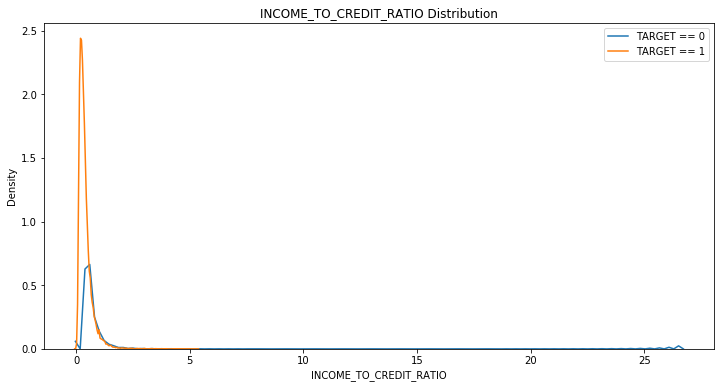

In [143]:
# There is one outstanding outliner in this column, we exclude it for kde plot but still keep it in the dataset
kde_plot(data_df.loc[data_df.INCOME_TO_CREDIT_RATIO<208], 'INCOME_TO_CREDIT_RATIO')

In [145]:
data_df['CREDIT_TO_ANNUITY_RATIO'].describe()

count    307511.000000
mean          0.053696
std           0.022482
min           0.018277
25%           0.036900
50%           0.050000
75%           0.064043
max           0.172118
Name: CREDIT_TO_ANNUITY_RATIO, dtype: float64

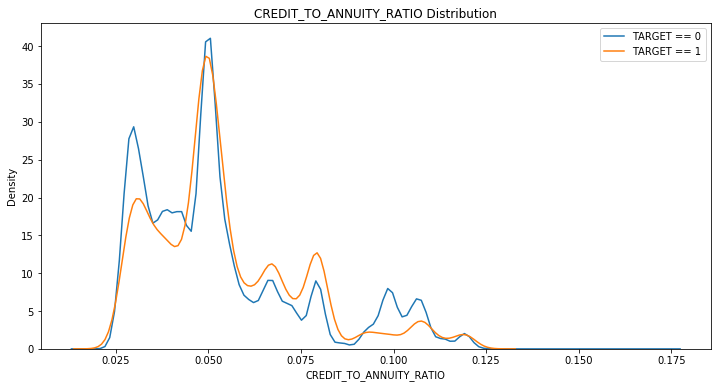

In [139]:
kde_plot(data_df, 'CREDIT_TO_ANNUITY_RATIO')

In [146]:
# Load Data in bureau
filename_bureau = "data/bureau.csv" 
bureau_df = pd.read_csv(filename_bureau)
bureau_df.shape

(1716428, 17)

In [147]:
bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [155]:
# Based on the description of bureau dataset, we select some related columns
select_col = ['SK_ID_CURR', 'CREDIT_DAY_OVERDUE', 'AMT_CREDIT_MAX_OVERDUE',
              'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE']

In [161]:
bureau_agg = bureau_df.loc[:, select_col].groupby('SK_ID_CURR', as_index = False).agg([np.mean, np.max]).reset_index()
bureau_agg.head()

SK_ID_CURR CREDIT_DAY_OVERDUE      AMT_CREDIT_MAX_OVERDUE            \
                           mean amax                   mean      amax   
0     100001                0.0    0                    NaN       NaN   
1     100002                0.0    0               1681.029  5043.645   
2     100003                0.0    0                  0.000     0.000   
3     100004                0.0    0                  0.000     0.000   
4     100005                0.0    0                  0.000     0.000   

  CNT_CREDIT_PROLONG      AMT_CREDIT_SUM           AMT_CREDIT_SUM_DEBT  \
                mean amax           mean      amax                mean   
0                0.0    0  207623.571429  378000.0        85240.928571   
1                0.0    0  108131.945625  450000.0        49156.200000   
2                0.0    0  254350.125000  810000.0            0.000000   
3                0.0    0   94518.900000   94537.8            0.000000   
4                0.0    0  219042.000000  568800.0       189469.500000   

            AMT_CREDIT_SUM_OVERDUE       
       amax                   mean amax  
0  373239.0                    0.0  0.0  
1  245781.0                    0.0  0.0  
2       0.0                    0.0  0.0  
3       0.0                    0.0  0.0  
4  543087.0                    0.0  0.0

In [162]:
# List of column names
bureau_agg_columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            bureau_agg_columns.append('bureau_%s_%s' % (var, stat))

In [163]:
# Assign the list of columns names as the dataframe column names
bureau_agg.columns = bureau_agg_columns
bureau_agg.head()

,SK_ID_CURR,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_amax,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_amax,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_amax,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_amax,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_amax,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_amax
0,100001,0.0,0,NaN,NaN,0.0,0,207623.571429,378000.0,85240.928571,373239.0,0.0,0.0
1,100002,0.0,0,1681.029,5043.645,0.0,0,108131.945625,450000.0,49156.200000,245781.0,0.0,0.0
2,100003,0.0,0,0.000,0.000,0.0,0,254350.125000,810000.0,0.000000,0.0,0.0,0.0
3,100004,0.0,0,0.000,0.000,0.0,0,94518.900000,94537.8,0.000000,0.0,0.0,0.0
4,100005,0.0,0,0.000,0.000,0.0,0,219042.000000,568800.0,189469.500000,543087.0,0.0,0.0


In [159]:
bureau_agg.shape

(305811, 13)

In [164]:
# Join to the training dataframe
data_df = data_df.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
for col_name in bureau_agg_columns:
    data_df[col_name] = data_df[col_name].fillna(0)

data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_amax,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_amax,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_amax,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_amax,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_amax
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1681.029,5043.645,0.0,0.0,108131.945625,450000.0,49156.2,245781.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.000,0.000,0.0,0.0,254350.125000,810000.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.000,0.000,0.0,0.0,94518.900000,94537.8,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.000,0.000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.000,0.000,0.0,0.0,146250.000000,146250.0,0.0,0.0,0.0,0.0


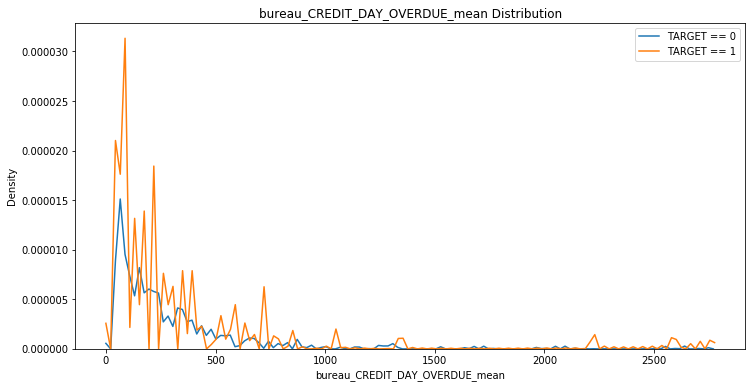

In [165]:
kde_plot(data_df, 'bureau_CREDIT_DAY_OVERDUE_mean')

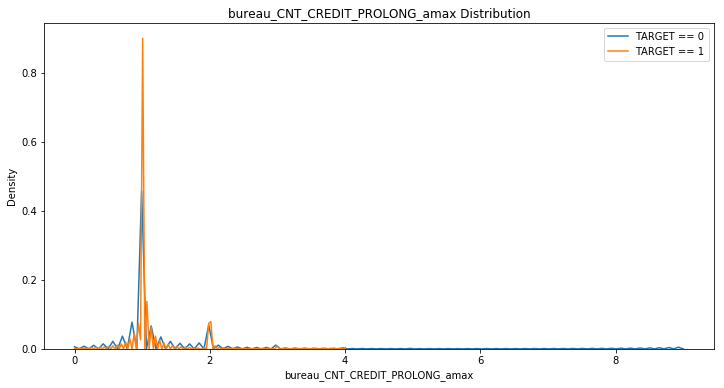

In [169]:
kde_plot(data_df, 'bureau_CNT_CREDIT_PROLONG_amax')

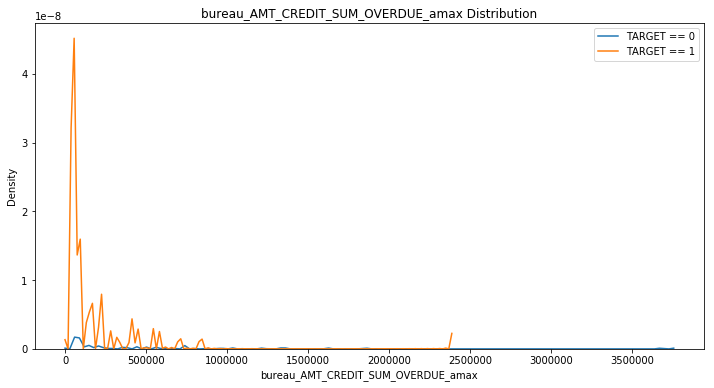

In [171]:
kde_plot(data_df, 'bureau_AMT_CREDIT_SUM_OVERDUE_amax')

In [175]:
#one-hot encode the categorical variables
data_df_factorized = pd.get_dummies(data_df)
data_df_factorized.shape

(307511, 271)

### Hyperparameter Selection 

In [226]:
#Downsample our data (stratified) for speed 

train_compute_mi_sample = data_df_factorized[data_df_factorized['TARGET'] ==1].sample(frac = 0.5, replace = False)
train_compute_mi_sample = train_compute_mi_sample.append(data_df_factorized[data_df_factorized['TARGET'] ==0].sample(frac = 0.1, replace = False))
train_compute_mi_sample.shape


(40681, 271)

In [227]:
train_compute_mi_sample['TARGET'].value_counts()

0    28269
1    12412
Name: TARGET, dtype: int64

In [228]:
# Extract the labels for training
labels = train_compute_mi_sample['TARGET']
features = train_compute_mi_sample.drop(columns = ['SK_ID_CURR', 'TARGET'])

In [229]:
# Use Cross Validation for Selecting 'n_estimators'
num_est = range(50, 300, 50)
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = features, y = labels, 
                                param_name = 'n_estimators', 
                                param_range = num_est)

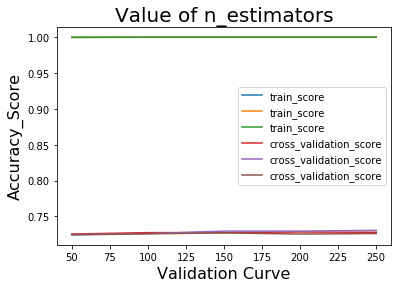

In [230]:
# Plot the Score for 'n_estimators' Values 
plt.plot(num_est, train_scoreNum, label='train_score')
plt.plot(num_est, test_scoreNum, label='cross_validation_score')
plt.xlabel("Validation Curve",fontsize=16)
plt.ylabel("Accuracy_Score", fontsize=16)
plt.title("Value of n_estimators", fontsize=20)
plt.legend()
plt.show()

In [233]:
# Use Cross Validation for Selecting 'max_depth'
num_max_depth = range(2, 20, 4)
train_scoreDep, test_scoreDep = validation_curve(
                                RandomForestClassifier(),
                                X = features, y = labels,
                                param_name = 'max_depth', 
                                param_range = num_max_depth)

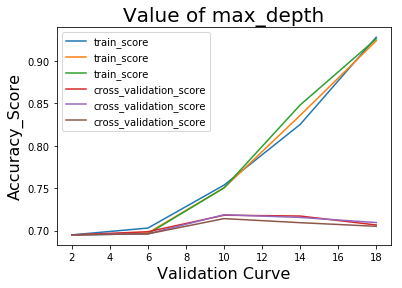

In [234]:
# Plot the Score for 'max_depth' Values 
plt.plot(num_max_depth, train_scoreDep, label='train_score')
plt.plot(num_max_depth, test_scoreDep, label='cross_validation_score')
plt.xlabel("Validation Curve",fontsize=16)
plt.ylabel("Accuracy_Score", fontsize=16)
plt.title("Value of max_depth", fontsize=20)
plt.legend()
plt.show()

### Model Building

Training Data Shape:  (307511, 269)


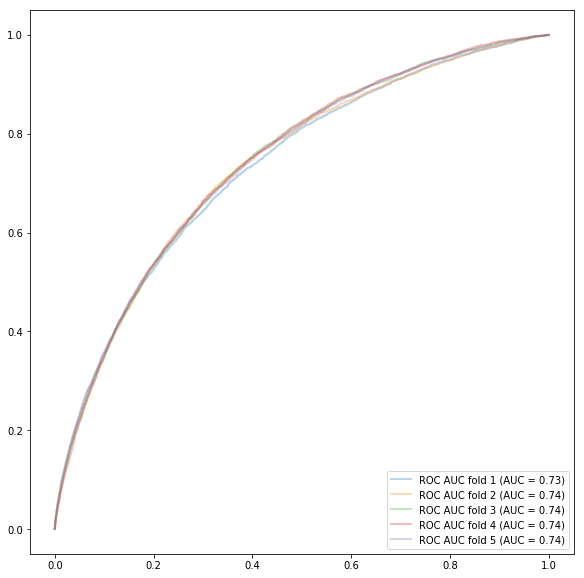

In [235]:
#do k-fold

# make plot
fig1 = plt.figure(figsize=[10,10])
ax1 = fig1.add_subplot(111, aspect = 'equal')

# Extract the ids
ids = data_df_factorized['SK_ID_CURR']

# Extract the labels for training
labels = data_df_factorized['TARGET']

features = data_df_factorized.drop(columns = ['SK_ID_CURR', 'TARGET'])

print('Training Data Shape: ', features.shape)

# Extract feature names
feature_names = list(features.columns)

# Convert to np arrays
training_matrix = np.array(features)

# Create the kfold object
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 50)

#make our model object
model = RandomForestClassifier(n_estimators=100, 
                               max_depth = 10, min_samples_split = 200, min_samples_leaf = 50)

# Empty array for feature importances
feature_importance_values = [[],[],[],[],[]]

tprs = []
aucs = []


#fold counter
i = 1

for train,test in k_fold.split(features,labels):
    prob = model.fit(features.iloc[train],labels.iloc[train]).predict_proba(features.iloc[test])[:,1]
    feature_importance_values[i-1] = pd.Series(model.feature_importances_, index = list(features))
    fpr, tpr, t = roc_curve(labels.iloc[test], prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC AUC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
    
plt.legend(loc="lower right")
plt.show()

In [242]:
# get the sum of feature importance of all 5 folders and sort 
feature_imp = (feature_importance_values[0]+feature_importance_values[1]+feature_importance_values[2]+feature_importance_values[3]+feature_importance_values[4]).sort_values(ascending=False)
feature_imp

EXT_SOURCE_2                                         0.860184
EXT_SOURCE_3                                         0.761795
EXT_SOURCE_1                                         0.257512
DAYS_BIRTH                                           0.194514
DAYS_EMPLOYED                                        0.175019
CREDIT_TO_ANNUITY_RATIO                              0.165939
DAYS_LAST_PHONE_CHANGE                               0.112952
AMT_GOODS_PRICE                                      0.108835
NAME_EDUCATION_TYPE_Higher education                 0.097571
bureau_AMT_CREDIT_SUM_DEBT_mean                      0.085443
AMT_CREDIT                                           0.083506
DAYS_ID_PUBLISH                                      0.082055
CODE_GENDER_M                                        0.068149
CODE_GENDER_F                                        0.062885
REGION_RATING_CLIENT_W_CITY                          0.062405
bureau_AMT_CREDIT_SUM_mean                           0.059950
bureau_A

In [244]:
# Select the Top 35 Variables
top_vars = feature_imp.head(35)
top_vars

EXT_SOURCE_2                                         0.860184
EXT_SOURCE_3                                         0.761795
EXT_SOURCE_1                                         0.257512
DAYS_BIRTH                                           0.194514
DAYS_EMPLOYED                                        0.175019
CREDIT_TO_ANNUITY_RATIO                              0.165939
DAYS_LAST_PHONE_CHANGE                               0.112952
AMT_GOODS_PRICE                                      0.108835
NAME_EDUCATION_TYPE_Higher education                 0.097571
bureau_AMT_CREDIT_SUM_DEBT_mean                      0.085443
AMT_CREDIT                                           0.083506
DAYS_ID_PUBLISH                                      0.082055
CODE_GENDER_M                                        0.068149
CODE_GENDER_F                                        0.062885
REGION_RATING_CLIENT_W_CITY                          0.062405
bureau_AMT_CREDIT_SUM_mean                           0.059950
bureau_A

No handles with labels found to put in legend.


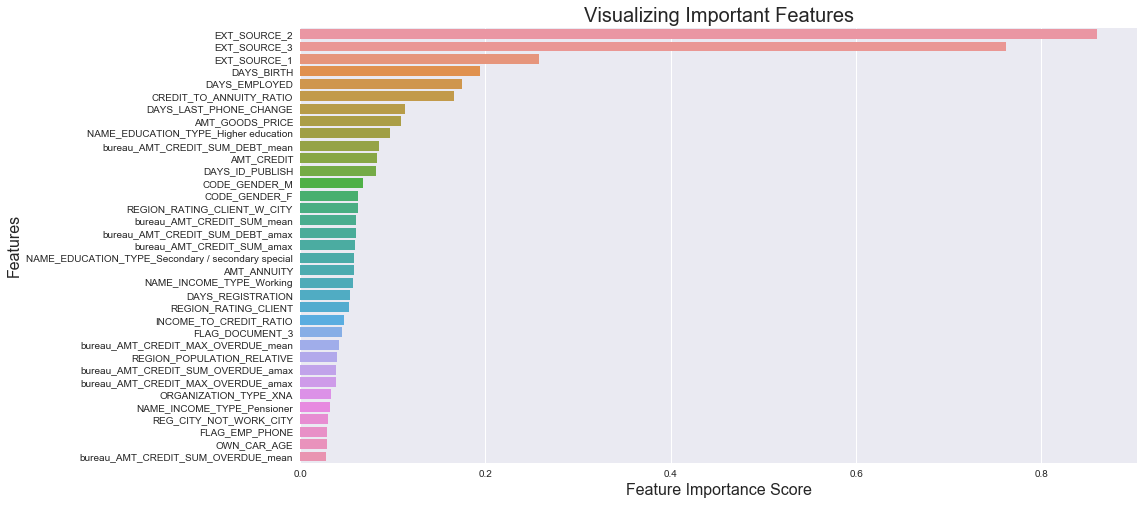

In [245]:
# Creating a Bar Plot for Top 35 Variables with their Importance Score
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = top_vars, y = top_vars.index)

# Add labels to your graph
plt.xlabel("Feature Importance Score", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.title("Visualizing Important Features", fontsize=20)
plt.legend()
plt.show()